In [ ]:
!pip install huggingface_hub

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from PIL import Image
from datasets import load_dataset

# Load the dataset with the `2m_first_1k` subset
dataset = load_dataset('poloclub/diffusiondb', '2m_first_1k')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# All data are stored in the `train` split
my_1k_data = dataset['train']
my_1k_data

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 1000
})

a renaissance portrait of dwayne johnson, art in the style of rembrandt!! intricate. ultra detailed, oil on canvas, wet - on - wet technique, pay attention to facial details, highly realistic, cinematic lightning, intricate textures, illusionistic detail, 


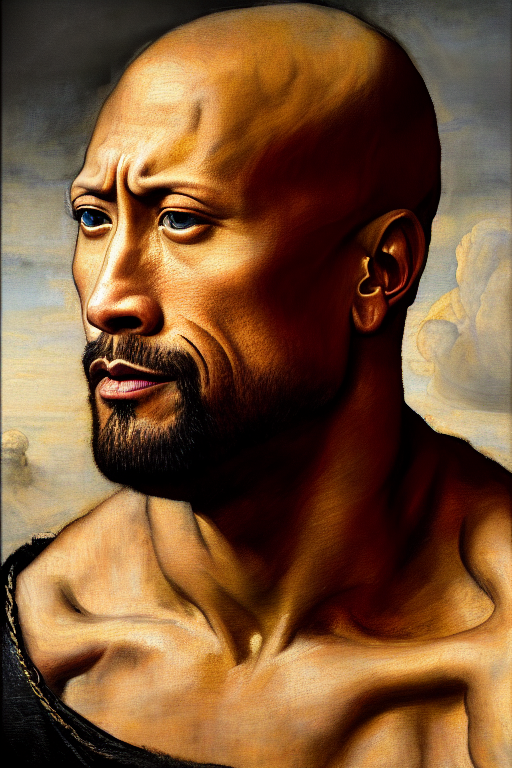

In [ ]:
index = 0

# Print out the prompt of this image
print(my_1k_data['prompt'][index])

# Display this image
image = my_1k_data['image'][index]
display(image)

In [ ]:
!pip install -U albumentations

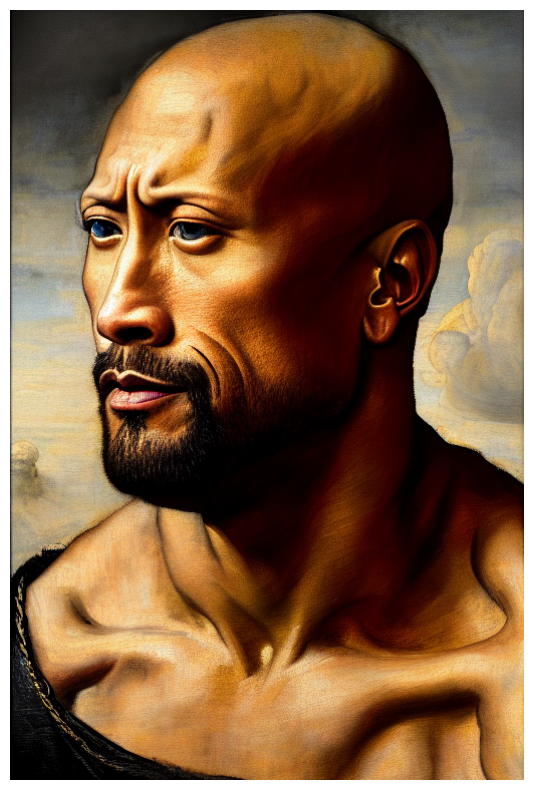

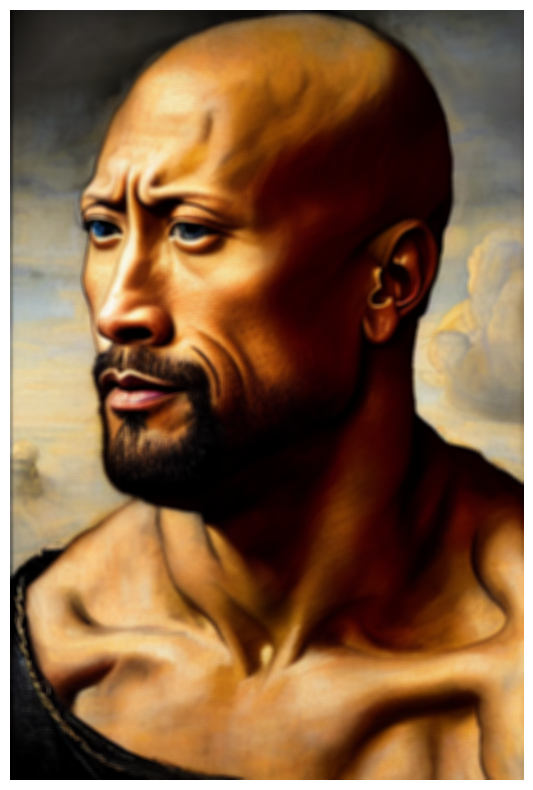

In [ ]:
import cv2
import io
import albumentations as A
import random
from matplotlib import pyplot as plt

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

random.seed(0)

image_data = np.array(image)
image = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
visualize(image)
# transform_blur = A.Blur(p=1)
# augmented_image_1 = transform_blur(image=image)['image']
# visualize(augmented_image_1)
# transform_transpose = A.Transpose(p=0.6)
# augmented_image_2 = transform_transpose(image=image)['image']
# visualize(augmented_image_2)
# transform_contrast = A.RandomBrightnessContrast(p=1)
# augmented_image_3 = transform_contrast(image=image)['image']
# visualize(augmented_image_3)

id_prefixes = ['blu','bri','con']
id_suffixes = ['1','2','3','4','5']

transform_id = 'blu5'

if transform_id == id_prefixes[0] + id_suffixes[0]:
  transform = A.Blur(p=1, blur_limit = 3)
if transform_id == id_prefixes[0] + id_suffixes[1]:
  transform = A.Blur(p=1, blur_limit = 4)
if transform_id == id_prefixes[0] + id_suffixes[2]:
  transform = A.Blur(p=1, blur_limit = 5)
if transform_id == id_prefixes[0] + id_suffixes[3]:
  transform = A.Blur(p=1, blur_limit = 6)
if transform_id == id_prefixes[0] + id_suffixes[4]:
  transform = A.Blur(p=1, blur_limit = 7)

if transform_id == id_prefixes[1] + id_suffixes[0]:
  transform = A.RandomBrightness(p=1, limit = 0.2)
if transform_id == id_prefixes[1] + id_suffixes[1]:
  transform = A.RandomBrightness(p=1, limit = 0.3)
if transform_id == id_prefixes[1] + id_suffixes[2]:
  transform = A.RandomBrightness(p=1, limit = 0.3)
if transform_id == id_prefixes[1] + id_suffixes[3]:
  transform = A.RandomBrightness(p=1, limit = 0.4)
if transform_id == id_prefixes[1] + id_suffixes[4]:
  transform = A.RandomBrightness(p=1, limit = 0.5)

if transform_id == id_prefixes[1] + id_suffixes[0]:
  transform = A.RandomContrast(p=1, limit = 0.2)
if transform_id == id_prefixes[1] + id_suffixes[1]:
  transform = A.RandomContrast(p=1, limit = 0.3)
if transform_id == id_prefixes[1] + id_suffixes[2]:
  transform = A.RandomContrast(p=1, limit = 0.3)
if transform_id == id_prefixes[1] + id_suffixes[3]:
  transform = A.RandomContrast(p=1, limit = 0.4)
if transform_id == id_prefixes[1] + id_suffixes[4]:
  transform = A.RandomContrast(p=1, limit = 0.5)

augmented_image = transform(image=image)['image']
visualize(augmented_image)